<a href="https://colab.research.google.com/github/hikmatfarhat-ndu/CSC645/blob/master/12Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from sklearn.datasets import fetch_olivetti_faces

In [2]:
data=fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 64, 64)
(400,)


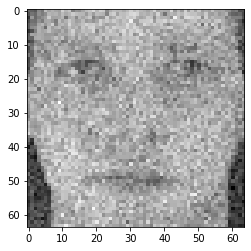

In [8]:
imgs=data['images']
labels=data['target']
print(imgs.shape)
print(labels.shape)
noise_factor = 0.1

imgs_train=imgs[0:350,:,:]
imgs_test=imgs[350:,:,:]
imgs_train_noisy = imgs_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs_train.shape) 
imgs_test_noisy = imgs_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs_test.shape) 
plt.imshow(np.squeeze(imgs_train_noisy[0].reshape(64,64)))


In [11]:
input_img = keras.Input(shape=(64, 64, 1))

#x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
#x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoded=layers.MaxPool2D((2,2),padding='same')(x)


x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
#x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
#x = layers.UpSampling2D((2, 2))(x)
#x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
#x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(imgs_train_noisy, imgs_train,
                epochs=50,
                batch_size=20,
                shuffle=True,
                verbose=1,
                validation_data=(imgs_test_noisy, imgs_test))

Epoch 1/50
18/18 [==============================] - 0s 17ms/step - loss: 0.6776 - val_loss: 0.6615
Epoch 2/50
18/18 [==============================] - 0s 11ms/step - loss: 0.6475 - val_loss: 0.6397
Epoch 3/50
18/18 [==============================] - 0s 10ms/step - loss: 0.6391 - val_loss: 0.6371
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 0.6367 - val_loss: 0.6348
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 0.6351 - val_loss: 0.6340
Epoch 6/50
18/18 [==============================] - 0s 8ms/step - loss: 0.6341 - val_loss: 0.6336
Epoch 7/50
18/18 [==============================] - 0s 8ms/step - loss: 0.6340 - val_loss: 0.6329
Epoch 8/50
18/18 [==============================] - 0s 8ms/step - loss: 0.6333 - val_loss: 0.6321
Epoch 9/50
18/18 [==============================] - 0s 8ms/step - loss: 0.6328 - val_loss: 0.6319
Epoch 10/50
18/18 [==============================] - 0s 8ms/step - loss: 0.6325 - val_loss: 0.6317
Epoch 11/50
18/1

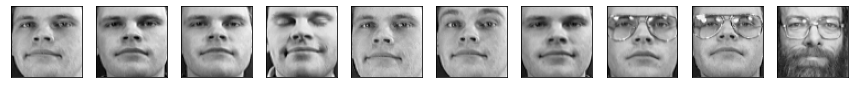

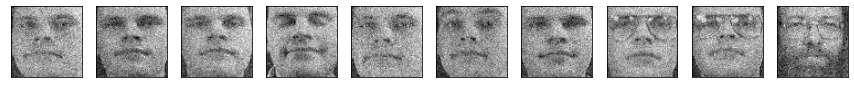

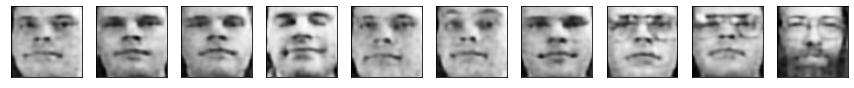

In [12]:
p=autoencoder.predict(imgs_test_noisy)
n = 10
plt.figure(figsize=(15, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(imgs_test[i].reshape(64,64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(15, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(imgs_test_noisy[i].reshape(64,64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(15, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(p[i].reshape(64,64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


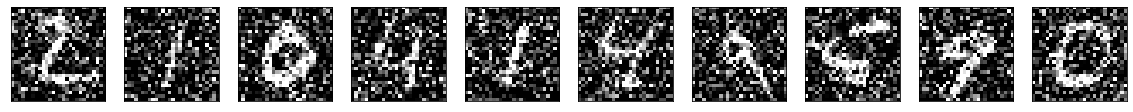

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
try:
    autoencoders.load_weights("weights.h5")
except:
    pass

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=1,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

469/469 [==============================] - 3s 6ms/step - loss: 0.1729 - val_loss: 0.1180


In [ ]:
autoencoder.save_weights("weights.h5")

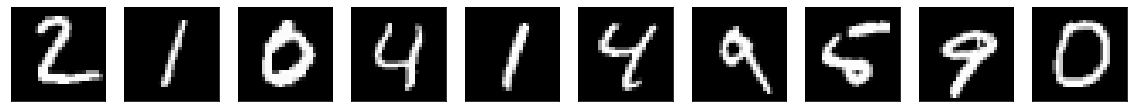

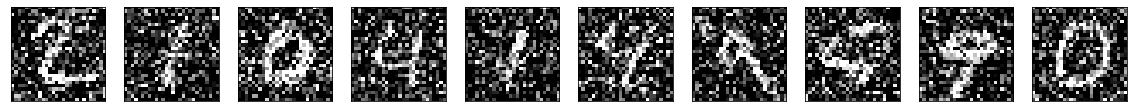

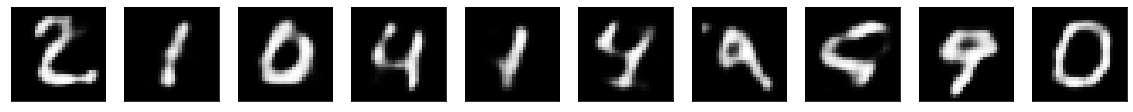

In [ ]:
p=autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(p[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784) 
x_train_noisy=x_train_noisy.reshape(len(x_train_noisy),784)
x_test_noisy=x_test_noisy.reshape(len(x_test_noisy),784)

autoencoder = keras.models.Sequential()
autoencoder.add(Dense(512,  activation='elu', input_shape=(784,)))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(10,    activation='linear', name="bottleneck"))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(512,  activation='elu'))
autoencoder.add(Dense(784,  activation='sigmoid'))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam())
trained_model = autoencoder.fit(x_train_noisy, x_train, batch_size=1024, epochs=3, verbose=1, validation_data=(x_test_noisy, x_test))



Epoch 1/3
59/59 [==============================] - 1s 9ms/step - loss: 0.0788 - val_loss: 0.0609
Epoch 2/3
59/59 [==============================] - 0s 7ms/step - loss: 0.0515 - val_loss: 0.0433
Epoch 3/3
59/59 [==============================] - 0s 7ms/step - loss: 0.0408 - val_loss: 0.0375


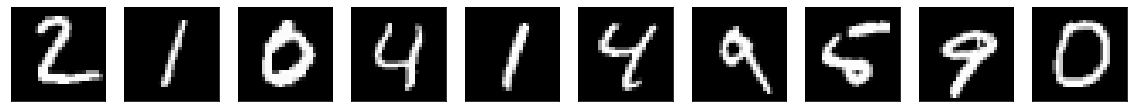

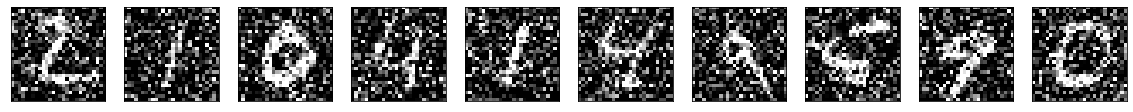

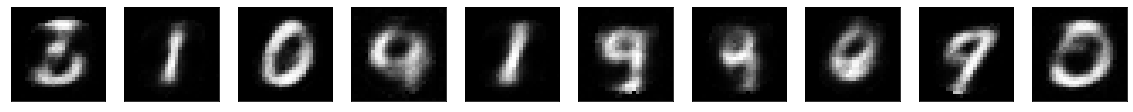

In [ ]:
p=autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(p[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
encoded_data = encoder.predict(train_x)  # bottleneck representation
decoded_output = autoencoder.predict(train_x)        # reconstruction
encoding_dim = 10

# return the decoder
encoded_input = Input(shape=(encoding_dim,))
decoder = autoencoder.layers[-3](encoded_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encoded_input, decoder)